In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

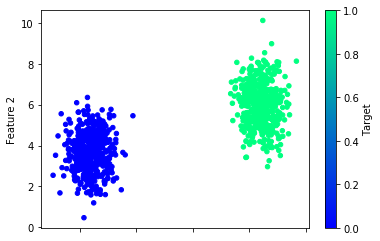

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.4607 - accuracy: 0.9853
Epoch 2/100
750/750 [==============================] - 0s 141us/sample - loss: 0.4496 - accuracy: 0.9853
Epoch 3/100
750/750 [==============================] - 0s 174us/sample - loss: 0.4387 - accuracy: 0.9853
Epoch 4/100
750/750 [==============================] - 0s 121us/sample - loss: 0.4281 - accuracy: 0.9853
Epoch 5/100
750/750 [==============================] - 0s 109us/sample - loss: 0.4178 - accuracy: 0.9853
Epoch 6/100
750/750 [==============================] - 0s 109us/sample - loss: 0.4079 - accuracy: 0.9853
Epoch 7/100
750/750 [==============================] - 0s 120us/sample - loss: 0.3983 - accuracy: 0.9867
Epoch 8/100
750/750 [==============================] - 0s 141us/sample - loss: 0.3889 - accuracy: 0.9867
Epoch 9/100
750/750 [==============================] - 0s 114us/sample - loss: 0.3799 - accuracy: 0.9880
Epoch 10/100
750/750 [==============

750/750 [==============================] - 0s 60us/sample - loss: 0.1020 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 60us/sample - loss: 0.1005 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 85us/sample - loss: 0.0989 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 90us/sample - loss: 0.0974 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 106us/sample - loss: 0.0959 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 122us/sample - loss: 0.0945 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 130us/sample - loss: 0.0931 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 113us/sample - loss: 0.0917 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 134us/sample - loss: 0.0903 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 130u

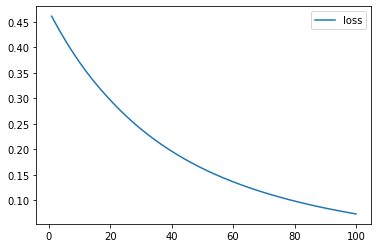

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

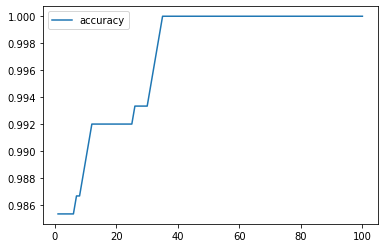

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0688 - accuracy: 1.0000
Loss: 0.06879841995239258, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

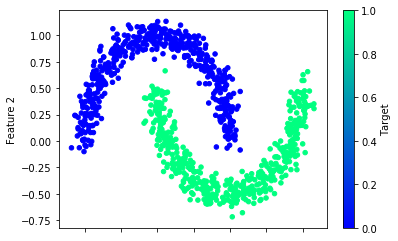

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 854us/sample - loss: 1.1630 - accuracy: 0.4800
Epoch 2/100
750/750 [==============================] - 0s 89us/sample - loss: 1.0026 - accuracy: 0.5107
Epoch 3/100
750/750 [==============================] - 0s 90us/sample - loss: 0.8998 - accuracy: 0.5333
Epoch 4/100
750/750 [==============================] - 0s 90us/sample - loss: 0.8351 - accuracy: 0.5560
Epoch 5/100
750/750 [==============================] - 0s 89us/sample - loss: 0.7895 - accuracy: 0.5720
Epoch 6/100
750/750 [==============================] - 0s 88us/sample - loss: 0.7540 - accuracy: 0.5867
Epoch 7/100
750/750 [==============================] - 0s 94us/sample - loss: 0.7257 - accuracy: 0.5987
Epoch 8/100
750/750 [==============================] - 0s 93us/sample - loss: 0.7023 - accuracy: 0.6107
Epoch 9/100
750/750 [==============================] - 0s 102us/sample - loss: 0.6823 - accuracy: 0.6200
Epoch 10/100
750/750 [===================

750/750 [==============================] - 0s 108us/sample - loss: 0.2845 - accuracy: 0.8853
Epoch 79/100
750/750 [==============================] - 0s 100us/sample - loss: 0.2835 - accuracy: 0.8853
Epoch 80/100
750/750 [==============================] - 0s 96us/sample - loss: 0.2827 - accuracy: 0.8853
Epoch 81/100
750/750 [==============================] - 0s 86us/sample - loss: 0.2819 - accuracy: 0.8880
Epoch 82/100
750/750 [==============================] - 0s 82us/sample - loss: 0.2811 - accuracy: 0.8893
Epoch 83/100
750/750 [==============================] - 0s 85us/sample - loss: 0.2803 - accuracy: 0.8893
Epoch 84/100
750/750 [==============================] - 0s 94us/sample - loss: 0.2795 - accuracy: 0.8893
Epoch 85/100
750/750 [==============================] - 0s 100us/sample - loss: 0.2787 - accuracy: 0.8907
Epoch 86/100
750/750 [==============================] - 0s 107us/sample - loss: 0.2781 - accuracy: 0.8907
Epoch 87/100
750/750 [==============================] - 0s 86us/

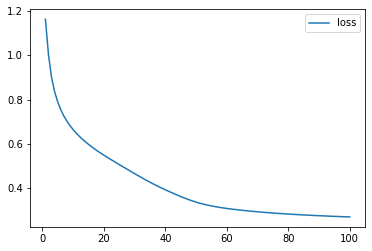

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

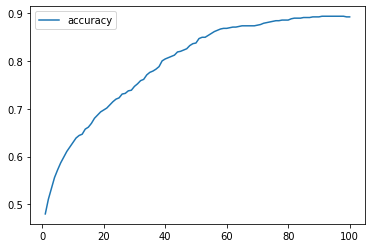

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 897us/sample - loss: 0.8718 - accuracy: 0.4387
Epoch 2/100
750/750 [==============================] - 0s 63us/sample - loss: 0.8079 - accuracy: 0.5520
Epoch 3/100
750/750 [==============================] - 0s 65us/sample - loss: 0.7550 - accuracy: 0.5733
Epoch 4/100
750/750 [==============================] - 0s 70us/sample - loss: 0.7086 - accuracy: 0.5840
Epoch 5/100
750/750 [==============================] - 0s 59us/sample - loss: 0.6684 - accuracy: 0.5933
Epoch 6/100
750/750 [==============================] - 0s 62us/sample - loss: 0.6344 - accuracy: 0.6027
Epoch 7/100
750/750 [==============================] - 0s 73us/sample - loss: 0.6042 - accuracy: 0.6187
Epoch 8/100
750/750 [==============================] - 0s 69us/sample - loss: 0.5776 - accuracy: 0.6307
Epoch 9/100
750/750 [==============================] - 0s 73us/sample - loss: 0.5538 - accuracy: 0.6600
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 184us/sample - loss: 0.2404 - accuracy: 0.9000
Epoch 79/100
750/750 [==============================] - 0s 213us/sample - loss: 0.2400 - accuracy: 0.9013
Epoch 80/100
750/750 [==============================] - 0s 141us/sample - loss: 0.2396 - accuracy: 0.9013
Epoch 81/100
750/750 [==============================] - 0s 176us/sample - loss: 0.2393 - accuracy: 0.9013
Epoch 82/100
750/750 [==============================] - 0s 102us/sample - loss: 0.2389 - accuracy: 0.9013
Epoch 83/100
750/750 [==============================] - 0s 132us/sample - loss: 0.2386 - accuracy: 0.9013
Epoch 84/100
750/750 [==============================] - 0s 189us/sample - loss: 0.2382 - accuracy: 0.9013
Epoch 85/100
750/750 [==============================] - 0s 188us/sample - loss: 0.2379 - accuracy: 0.9013
Epoch 86/100
750/750 [==============================] - 0s 202us/sample - loss: 0.2376 - accuracy: 0.9013
Epoch 87/100
750/750 [==============================] - 0s 

In [23]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Poland             4
Fiji               4
Holland            4
Finland            3
Sweden             3
Dubai              3
Sarawak            3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

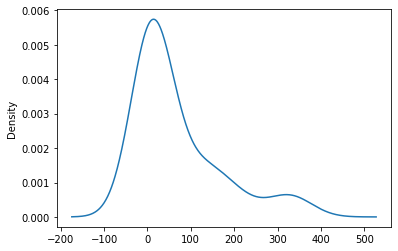

In [24]:
# Visualize the value counts
country_counts.plot.density()

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [26]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [29]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [31]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [32]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [33]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [35]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [37]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [39]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 1102 samples
Epoch 1/100
1102/1102 [==============================] - 1s 820us/sample - loss: 787.2538 - accuracy: 0.8276
Epoch 2/100
1102/1102 [==============================] - 0s 91us/sample - loss: 549.9955 - accuracy: 0.8276
Epoch 3/100
1102/1102 [==============================] - 0s 98us/sample - loss: 371.8543 - accuracy: 0.8276
Epoch 4/100
1102/1102 [==============================] - 0s 91us/sample - loss: 245.1172 - accuracy: 0.8285
Epoch 5/100
1102/1102 [==============================] - 0s 93us/sample - loss: 140.4083 - accuracy: 0.8140
Epoch 6/100
1102/1102 [==============================] - 0s 120us/sample - loss: 80.6730 - accuracy: 0.7423
Epoch 7/100
1102/1102 [==============================] - 0s 85us/sample - loss: 69.5934 - accuracy: 0.7550
Epoch 8/100
1102/1102 [==============================] - 0s 90us/sample - loss: 62.6522 - accuracy: 0.7641
Epoch 9/100
1102/1102 [==============================] - 0s 80us/sample - loss: 53.8289 - accuracy: 0.7532
Epoch 10

1102/1102 [==============================] - 0s 71us/sample - loss: 0.4566 - accuracy: 0.8276
Epoch 78/100
1102/1102 [==============================] - 0s 94us/sample - loss: 0.4557 - accuracy: 0.8276
Epoch 79/100
1102/1102 [==============================] - 0s 86us/sample - loss: 0.4552 - accuracy: 0.8276
Epoch 80/100
1102/1102 [==============================] - 0s 79us/sample - loss: 0.4546 - accuracy: 0.8276
Epoch 81/100
1102/1102 [==============================] - 0s 71us/sample - loss: 0.4544 - accuracy: 0.8276
Epoch 82/100
1102/1102 [==============================] - 0s 71us/sample - loss: 0.4540 - accuracy: 0.8276
Epoch 83/100
1102/1102 [==============================] - 0s 78us/sample - loss: 0.4537 - accuracy: 0.8276
Epoch 84/100
1102/1102 [==============================] - 0s 74us/sample - loss: 0.4534 - accuracy: 0.8276
Epoch 85/100
1102/1102 [==============================] - 0s 69us/sample - loss: 0.4530 - accuracy: 0.8276
Epoch 86/100
1102/1102 [==========================

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

368/368 - 0s - loss: 0.7573 - accuracy: 0.8668
Loss: 0.7573490570420804, Accuracy: 0.866847813129425


In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [46]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [48]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 576 samples
Epoch 1/100
576/576 [==============================] - 1s 1ms/sample - loss: 0.6861 - accuracy: 0.6285
Epoch 2/100
576/576 [==============================] - 0s 71us/sample - loss: 0.6494 - accuracy: 0.6736
Epoch 3/100
576/576 [==============================] - 0s 119us/sample - loss: 0.6200 - accuracy: 0.6979
Epoch 4/100
576/576 [==============================] - 0s 116us/sample - loss: 0.5948 - accuracy: 0.6979 - loss: 0.5892 - accuracy: 0.69
Epoch 5/100
576/576 [==============================] - 0s 107us/sample - loss: 0.5740 - accuracy: 0.7135
Epoch 6/100
576/576 [==============================] - 0s 110us/sample - loss: 0.5560 - accuracy: 0.7292
Epoch 7/100
576/576 [==============================] - 0s 102us/sample - loss: 0.5415 - accuracy: 0.7413
Epoch 8/100
576/576 [==============================] - 0s 123us/sample - loss: 0.5295 - accuracy: 0.7465
Epoch 9/100
576/576 [==============================] - 0s 144us/sample - loss: 0.5178 - accuracy: 0.7552
Epoch

576/576 [==============================] - 0s 151us/sample - loss: 0.4300 - accuracy: 0.7934
Epoch 78/100
576/576 [==============================] - 0s 130us/sample - loss: 0.4291 - accuracy: 0.7934
Epoch 79/100
576/576 [==============================] - 0s 208us/sample - loss: 0.4287 - accuracy: 0.7934
Epoch 80/100
576/576 [==============================] - 0s 156us/sample - loss: 0.4284 - accuracy: 0.7951
Epoch 81/100
576/576 [==============================] - 0s 230us/sample - loss: 0.4281 - accuracy: 0.7951
Epoch 82/100
576/576 [==============================] - 0s 219us/sample - loss: 0.4275 - accuracy: 0.7951
Epoch 83/100
576/576 [==============================] - 0s 152us/sample - loss: 0.4272 - accuracy: 0.7951
Epoch 84/100
576/576 [==============================] - 0s 192us/sample - loss: 0.4271 - accuracy: 0.7951
Epoch 85/100
576/576 [==============================] - 0s 262us/sample - loss: 0.4269 - accuracy: 0.7951
Epoch 86/100
576/576 [==============================] - 0s 

In [49]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [50]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [51]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [53]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
# Create the SVM model
svm = SVC(kernel='linear')

In [55]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [57]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy =
nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

SyntaxError: invalid syntax (<ipython-input-58-c8c2074ef799>, line 4)

In [59]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [60]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [61]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [62]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [63]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
# Create the SVM model
svm = SVC(kernel='linear')

In [69]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [71]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy =
nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

SyntaxError: invalid syntax (<ipython-input-72-c8c2074ef799>, line 4)

In [73]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [74]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [75]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [76]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [79]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


In [80]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 27317 samples
Epoch 1/50
27317/27317 [==============================] - 3s 92us/sample - loss: 0.4478 - accuracy: 0.8214
Epoch 2/50
27317/27317 [==============================] - 3s 115us/sample - loss: 0.3868 - accuracy: 0.8492
Epoch 3/50
27317/27317 [==============================] - 3s 122us/sample - loss: 0.3817 - accuracy: 0.8493 - loss: 0.3815 - ac
Epoch 4/50
27317/27317 [==============================] - 4s 150us/sample - loss: 0.3799 - accuracy: 0.8494
Epoch 5/50
27317/27317 [==============================] - 2s 68us/sample - loss: 0.3784 - accuracy: 0.8498
Epoch 6/50
27317/27317 [==============================] - 2s 64us/sample - loss: 0.3772 - accuracy: 0.8495
Epoch 7/50
27317/27317 [==============================] - 3s 97us/sample - loss: 0.3768 - accuracy: 0.8496
Epoch 8/50
27317/27317 [==============================] - 2s 72us/sample - loss: 0.3760 - accuracy: 0.8493
Epoch 9/50
27317/27317 [==============================] - 2s 85us/sample - loss: 0.3753 - accuracy

In [81]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [82]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 27317 samples
Epoch 1/100
  800/27317 [..............................] - ETA: 32s - loss: 0.3570 - accuracy: 0.8562 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1632/27317 [>.............................] - ETA: 23s - loss: 0.3547 - accuracy: 0.8591
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2880/27317 [==>...........................] - ETA: 13s - loss: 0.3520 - accuracy: 0.8594
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3904/27317 [===>..........................] - ETA: 10s - loss: 0.3536 - accuracy: 0.8586
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4992/27317 [====>.........................] - ETA: 8s - loss: 0.3566 - accuracy: 0.8562
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6080/27317 [=====>........................] - ETA: 7s - loss: 0.3599 - accuracy: 0.8549
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6976/27317 [======>.......................] - ETA: 6s - loss: 0.3582 - accuracy: 0.

 1312/27317 [>.............................] - ETA: 3s - loss: 0.3741 - accuracy: 0.8399
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 2432/27317 [=>............................] - ETA: 3s - loss: 0.3757 - accuracy: 0.8388
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 3552/27317 [==>...........................] - ETA: 3s - loss: 0.3719 - accuracy: 0.8449
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4512/27317 [===>..........................] - ETA: 3s - loss: 0.3722 - accuracy: 0.8444
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5376/27317 [====>.........................] - ETA: 2s - loss: 0.3706 - accuracy: 0.8451
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6304/27317 [=====>........................] - ETA: 2s - loss: 0.3672 - accuracy: 0.8474
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7584/27317 [=======>......................] - ETA: 2s - loss: 0.3625 - accuracy: 0.8509
Epoch 00003: saving model to checkp

 2912/27317 [==>...........................] - ETA: 3s - loss: 0.3593 - accuracy: 0.8475
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 4096/27317 [===>..........................] - ETA: 3s - loss: 0.3599 - accuracy: 0.8494
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 5152/27317 [====>.........................] - ETA: 2s - loss: 0.3664 - accuracy: 0.8482
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 6208/27317 [=====>........................] - ETA: 2s - loss: 0.3661 - accuracy: 0.8484
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 7200/27317 [======>.......................] - ETA: 2s - loss: 0.3637 - accuracy: 0.8503
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 8288/27317 [========>.....................] - ETA: 2s - loss: 0.3606 - accuracy: 0.8524
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9408/27317 [=========>....................] - ETA: 2s - loss: 0.3616 - accuracy: 0.8511
Epoch 00005: saving model to checkp

 3584/27317 [==>...........................] - ETA: 2s - loss: 0.3460 - accuracy: 0.8608
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 4768/27317 [====>.........................] - ETA: 2s - loss: 0.3533 - accuracy: 0.8561
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5824/27317 [=====>........................] - ETA: 2s - loss: 0.3521 - accuracy: 0.8570
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 7008/27317 [======>.......................] - ETA: 1s - loss: 0.3568 - accuracy: 0.8530
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 7520/27317 [=======>......................] - ETA: 1s - loss: 0.3569 - accuracy: 0.8531
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 8864/27317 [========>.....................] - ETA: 1s - loss: 0.3595 - accuracy: 0.8512
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9952/27317 [=========>....................] - ETA: 1s - loss: 0.3587 - accuracy: 0.8517
Epoch 00007: saving model to checkp

 4384/27317 [===>..........................] - ETA: 2s - loss: 0.3593 - accuracy: 0.8524
Epoch 00009: saving model to checkpoints/weights.09.hdf5
 5344/27317 [====>.........................] - ETA: 2s - loss: 0.3535 - accuracy: 0.8559
Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6368/27317 [=====>........................] - ETA: 2s - loss: 0.3544 - accuracy: 0.8563
Epoch 00009: saving model to checkpoints/weights.09.hdf5
 7168/27317 [======>.......................] - ETA: 2s - loss: 0.3533 - accuracy: 0.8567
Epoch 00009: saving model to checkpoints/weights.09.hdf5
 8224/27317 [========>.....................] - ETA: 2s - loss: 0.3540 - accuracy: 0.8570
Epoch 00009: saving model to checkpoints/weights.09.hdf5
 9568/27317 [=========>....................] - ETA: 2s - loss: 0.3556 - accuracy: 0.8554
Epoch 00009: saving model to checkpoints/weights.09.hdf5
10208/27317 [==========>...................] - ETA: 2s - loss: 0.3565 - accuracy: 0.8547
Epoch 00009: saving model to checkp

 5952/27317 [=====>........................] - ETA: 2s - loss: 0.3675 - accuracy: 0.8476
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 6816/27317 [======>.......................] - ETA: 2s - loss: 0.3677 - accuracy: 0.8480
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 7776/27317 [=======>......................] - ETA: 2s - loss: 0.3709 - accuracy: 0.8457
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 8896/27317 [========>.....................] - ETA: 2s - loss: 0.3681 - accuracy: 0.8476
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 9984/27317 [=========>....................] - ETA: 2s - loss: 0.3665 - accuracy: 0.8487
Epoch 00011: saving model to checkpoints/weights.11.hdf5
11328/27317 [===========>..................] - ETA: 2s - loss: 0.3630 - accuracy: 0.8507
Epoch 00011: saving model to checkpoints/weights.11.hdf5
12160/27317 [============>.................] - ETA: 2s - loss: 0.3620 - accuracy: 0.8512
Epoch 00011: saving model to checkp

 6368/27317 [=====>........................] - ETA: 2s - loss: 0.3717 - accuracy: 0.8477
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 7456/27317 [=======>......................] - ETA: 2s - loss: 0.3702 - accuracy: 0.8476
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 8736/27317 [========>.....................] - ETA: 2s - loss: 0.3688 - accuracy: 0.8478
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9632/27317 [=========>....................] - ETA: 2s - loss: 0.3680 - accuracy: 0.8479
Epoch 00013: saving model to checkpoints/weights.13.hdf5
10496/27317 [==========>...................] - ETA: 2s - loss: 0.3674 - accuracy: 0.8487
Epoch 00013: saving model to checkpoints/weights.13.hdf5
11584/27317 [===========>..................] - ETA: 2s - loss: 0.3651 - accuracy: 0.8498
Epoch 00013: saving model to checkpoints/weights.13.hdf5
12608/27317 [============>.................] - ETA: 1s - loss: 0.3644 - accuracy: 0.8503
Epoch 00013: saving model to checkp

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8384/27317 [========>.....................] - ETA: 2s - loss: 0.3618 - accuracy: 0.8484
Epoch 00015: saving model to checkpoints/weights.15.hdf5
 9248/27317 [=========>....................] - ETA: 2s - loss: 0.3588 - accuracy: 0.8499
Epoch 00015: saving model to checkpoints/weights.15.hdf5
10368/27317 [==========>...................] - ETA: 2s - loss: 0.3606 - accuracy: 0.8495
Epoch 00015: saving model to checkpoints/weights.15.hdf5
11328/27317 [===========>..................] - ETA: 2s - loss: 0.3615 - accuracy: 0.8495
Epoch 00015: saving model to checkpoints/weights.15.hdf5
12480/27317 [============>.................] - ETA: 2s - loss: 0.3615 - accuracy: 0.8500
Epoch 00015: saving model to checkpoints/weights.15.hdf5
13600/27317 [=============>................] - ETA: 1s - loss: 0.3625 - accuracy: 0.8496
Epoch 00015: saving model to checkpoints/weights.15.hdf5
14688/27317 [===============>..............] - ETA: 1s - loss: 0.36

 8896/27317 [========>.....................] - ETA: 4s - loss: 0.3530 - accuracy: 0.8541
Epoch 00017: saving model to checkpoints/weights.17.hdf5
10048/27317 [==========>...................] - ETA: 4s - loss: 0.3545 - accuracy: 0.8535
Epoch 00017: saving model to checkpoints/weights.17.hdf5
11072/27317 [===========>..................] - ETA: 4s - loss: 0.3546 - accuracy: 0.8535
Epoch 00017: saving model to checkpoints/weights.17.hdf5
11872/27317 [============>.................] - ETA: 4s - loss: 0.3552 - accuracy: 0.8534
Epoch 00017: saving model to checkpoints/weights.17.hdf5
13184/27317 [=============>................] - ETA: 3s - loss: 0.3553 - accuracy: 0.8542
Epoch 00017: saving model to checkpoints/weights.17.hdf5
14240/27317 [==============>...............] - ETA: 3s - loss: 0.3538 - accuracy: 0.8549
Epoch 00017: saving model to checkpoints/weights.17.hdf5
15296/27317 [===============>..............] - ETA: 3s - loss: 0.3528 - accuracy: 0.8557
Epoch 00017: saving model to checkp

 9824/27317 [=========>....................] - ETA: 4s - loss: 0.3467 - accuracy: 0.8594
Epoch 00019: saving model to checkpoints/weights.19.hdf5
10688/27317 [==========>...................] - ETA: 4s - loss: 0.3491 - accuracy: 0.8576
Epoch 00019: saving model to checkpoints/weights.19.hdf5
11744/27317 [===========>..................] - ETA: 4s - loss: 0.3505 - accuracy: 0.8571
Epoch 00019: saving model to checkpoints/weights.19.hdf5
12704/27317 [============>.................] - ETA: 3s - loss: 0.3507 - accuracy: 0.8567
Epoch 00019: saving model to checkpoints/weights.19.hdf5
13696/27317 [==============>...............] - ETA: 3s - loss: 0.3511 - accuracy: 0.8565
Epoch 00019: saving model to checkpoints/weights.19.hdf5
14656/27317 [===============>..............] - ETA: 3s - loss: 0.3519 - accuracy: 0.8563
Epoch 00019: saving model to checkpoints/weights.19.hdf5
15904/27317 [================>.............] - ETA: 3s - loss: 0.3519 - accuracy: 0.8566
Epoch 00019: saving model to checkp

11456/27317 [===========>..................] - ETA: 2s - loss: 0.3550 - accuracy: 0.8539
Epoch 00021: saving model to checkpoints/weights.21.hdf5
12480/27317 [============>.................] - ETA: 2s - loss: 0.3563 - accuracy: 0.8523
Epoch 00021: saving model to checkpoints/weights.21.hdf5
13440/27317 [=============>................] - ETA: 2s - loss: 0.3575 - accuracy: 0.8519
Epoch 00021: saving model to checkpoints/weights.21.hdf5
14400/27317 [==============>...............] - ETA: 2s - loss: 0.3578 - accuracy: 0.8517
Epoch 00021: saving model to checkpoints/weights.21.hdf5
15456/27317 [===============>..............] - ETA: 1s - loss: 0.3595 - accuracy: 0.8508
Epoch 00021: saving model to checkpoints/weights.21.hdf5
16512/27317 [=================>............] - ETA: 1s - loss: 0.3577 - accuracy: 0.8523
Epoch 00021: saving model to checkpoints/weights.21.hdf5
17600/27317 [==================>...........] - ETA: 1s - loss: 0.3563 - accuracy: 0.8534
Epoch 00021: saving model to checkp

Epoch 00023: saving model to checkpoints/weights.23.hdf5
12960/27317 [=============>................] - ETA: 3s - loss: 0.3607 - accuracy: 0.8519
Epoch 00023: saving model to checkpoints/weights.23.hdf5
13632/27317 [=============>................] - ETA: 3s - loss: 0.3630 - accuracy: 0.8503
Epoch 00023: saving model to checkpoints/weights.23.hdf5
14784/27317 [===============>..............] - ETA: 2s - loss: 0.3628 - accuracy: 0.8500
Epoch 00023: saving model to checkpoints/weights.23.hdf5
15904/27317 [================>.............] - ETA: 2s - loss: 0.3617 - accuracy: 0.8510
Epoch 00023: saving model to checkpoints/weights.23.hdf5
17120/27317 [=================>............] - ETA: 2s - loss: 0.3600 - accuracy: 0.8513
Epoch 00023: saving model to checkpoints/weights.23.hdf5
18144/27317 [==================>...........] - ETA: 2s - loss: 0.3588 - accuracy: 0.8524
Epoch 00023: saving model to checkpoints/weights.23.hdf5
19072/27317 [===================>..........] - ETA: 1s - loss: 0.35

13536/27317 [=============>................] - ETA: 2s - loss: 0.3532 - accuracy: 0.8576
Epoch 00025: saving model to checkpoints/weights.25.hdf5
14528/27317 [==============>...............] - ETA: 2s - loss: 0.3531 - accuracy: 0.8577
Epoch 00025: saving model to checkpoints/weights.25.hdf5
15648/27317 [================>.............] - ETA: 2s - loss: 0.3522 - accuracy: 0.8578
Epoch 00025: saving model to checkpoints/weights.25.hdf5
16384/27317 [================>.............] - ETA: 1s - loss: 0.3526 - accuracy: 0.8577
Epoch 00025: saving model to checkpoints/weights.25.hdf5
17376/27317 [==================>...........] - ETA: 1s - loss: 0.3535 - accuracy: 0.8566
Epoch 00025: saving model to checkpoints/weights.25.hdf5
18528/27317 [===================>..........] - ETA: 1s - loss: 0.3528 - accuracy: 0.8565
Epoch 00025: saving model to checkpoints/weights.25.hdf5
19680/27317 [====================>.........] - ETA: 1s - loss: 0.3539 - accuracy: 0.8561
Epoch 00025: saving model to checkp

15360/27317 [===============>..............] - ETA: 1s - loss: 0.3590 - accuracy: 0.8512
Epoch 00027: saving model to checkpoints/weights.27.hdf5
16384/27317 [================>.............] - ETA: 1s - loss: 0.3592 - accuracy: 0.8511
Epoch 00027: saving model to checkpoints/weights.27.hdf5
17504/27317 [==================>...........] - ETA: 1s - loss: 0.3581 - accuracy: 0.8524
Epoch 00027: saving model to checkpoints/weights.27.hdf5
18304/27317 [===================>..........] - ETA: 1s - loss: 0.3587 - accuracy: 0.8524
Epoch 00027: saving model to checkpoints/weights.27.hdf5
19200/27317 [====================>.........] - ETA: 1s - loss: 0.3578 - accuracy: 0.8532
Epoch 00027: saving model to checkpoints/weights.27.hdf5
20320/27317 [=====================>........] - ETA: 1s - loss: 0.3594 - accuracy: 0.8524
Epoch 00027: saving model to checkpoints/weights.27.hdf5
21120/27317 [======================>.......] - ETA: 0s - loss: 0.3608 - accuracy: 0.8514
Epoch 00027: saving model to checkp

16800/27317 [=================>............] - ETA: 1s - loss: 0.3552 - accuracy: 0.8527
Epoch 00029: saving model to checkpoints/weights.29.hdf5
17856/27317 [==================>...........] - ETA: 0s - loss: 0.3539 - accuracy: 0.8536
Epoch 00029: saving model to checkpoints/weights.29.hdf5
19040/27317 [===================>..........] - ETA: 0s - loss: 0.3546 - accuracy: 0.8540
Epoch 00029: saving model to checkpoints/weights.29.hdf5
20192/27317 [=====================>........] - ETA: 0s - loss: 0.3556 - accuracy: 0.8532
Epoch 00029: saving model to checkpoints/weights.29.hdf5
20704/27317 [=====================>........] - ETA: 0s - loss: 0.3558 - accuracy: 0.8531
Epoch 00029: saving model to checkpoints/weights.29.hdf5
22048/27317 [=======================>......] - ETA: 0s - loss: 0.3572 - accuracy: 0.8525
Epoch 00029: saving model to checkpoints/weights.29.hdf5
22784/27317 [========================>.....] - ETA: 0s - loss: 0.3585 - accuracy: 0.8519
Epoch 00029: saving model to checkp

Epoch 00031: saving model to checkpoints/weights.31.hdf5
18432/27317 [===================>..........] - ETA: 1s - loss: 0.3560 - accuracy: 0.8535
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19488/27317 [====================>.........] - ETA: 1s - loss: 0.3574 - accuracy: 0.8526
Epoch 00031: saving model to checkpoints/weights.31.hdf5
20416/27317 [=====================>........] - ETA: 0s - loss: 0.3573 - accuracy: 0.8526
Epoch 00031: saving model to checkpoints/weights.31.hdf5
21440/27317 [======================>.......] - ETA: 0s - loss: 0.3564 - accuracy: 0.8534
Epoch 00031: saving model to checkpoints/weights.31.hdf5
22656/27317 [=======================>......] - ETA: 0s - loss: 0.3546 - accuracy: 0.8545
Epoch 00031: saving model to checkpoints/weights.31.hdf5
23744/27317 [=========================>....] - ETA: 0s - loss: 0.3553 - accuracy: 0.8535
Epoch 00031: saving model to checkpoints/weights.31.hdf5
24800/27317 [==========================>...] - ETA: 0s - loss: 0.35

19360/27317 [====================>.........] - ETA: 0s - loss: 0.3575 - accuracy: 0.8510
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20448/27317 [=====================>........] - ETA: 0s - loss: 0.3571 - accuracy: 0.8516
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21376/27317 [======================>.......] - ETA: 0s - loss: 0.3566 - accuracy: 0.8516
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21664/27317 [======================>.......] - ETA: 0s - loss: 0.3567 - accuracy: 0.8517
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23360/27317 [========================>.....] - ETA: 0s - loss: 0.3556 - accuracy: 0.8525
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24384/27317 [=========================>....] - ETA: 0s - loss: 0.3566 - accuracy: 0.8522
Epoch 00033: saving model to checkpoints/weights.33.hdf5
25440/27317 [==========================>...] - ETA: 0s - loss: 0.3568 - accuracy: 0.8524
Epoch 00033: saving model to checkp

19872/27317 [====================>.........] - ETA: 0s - loss: 0.3562 - accuracy: 0.8525
Epoch 00035: saving model to checkpoints/weights.35.hdf5
20896/27317 [=====================>........] - ETA: 0s - loss: 0.3553 - accuracy: 0.8530
Epoch 00035: saving model to checkpoints/weights.35.hdf5
21280/27317 [======================>.......] - ETA: 0s - loss: 0.3559 - accuracy: 0.8529
Epoch 00035: saving model to checkpoints/weights.35.hdf5
23008/27317 [========================>.....] - ETA: 0s - loss: 0.3559 - accuracy: 0.8532
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24000/27317 [=========================>....] - ETA: 0s - loss: 0.3565 - accuracy: 0.8523
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24704/27317 [==========================>...] - ETA: 0s - loss: 0.3565 - accuracy: 0.8526
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25920/27317 [===========================>..] - ETA: 0s - loss: 0.3569 - accuracy: 0.8526
Epoch 00035: saving model to checkp

Epoch 00037: saving model to checkpoints/weights.37.hdf5
21184/27317 [======================>.......] - ETA: 0s - loss: 0.3581 - accuracy: 0.8518
Epoch 00037: saving model to checkpoints/weights.37.hdf5
22400/27317 [=======================>......] - ETA: 0s - loss: 0.3565 - accuracy: 0.8527
Epoch 00037: saving model to checkpoints/weights.37.hdf5
23328/27317 [========================>.....] - ETA: 0s - loss: 0.3558 - accuracy: 0.8531
Epoch 00037: saving model to checkpoints/weights.37.hdf5
24576/27317 [=========================>....] - ETA: 0s - loss: 0.3560 - accuracy: 0.8532
Epoch 00037: saving model to checkpoints/weights.37.hdf5
25504/27317 [===========================>..] - ETA: 0s - loss: 0.3543 - accuracy: 0.8540
Epoch 00037: saving model to checkpoints/weights.37.hdf5
26464/27317 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8535
Epoch 00037: saving model to checkpoints/weights.37.hdf5
27317/27317 [==============================] - 4s 148us/sample - lo

21984/27317 [=======================>......] - ETA: 0s - loss: 0.3527 - accuracy: 0.8557
Epoch 00039: saving model to checkpoints/weights.39.hdf5
23040/27317 [========================>.....] - ETA: 0s - loss: 0.3545 - accuracy: 0.8544
Epoch 00039: saving model to checkpoints/weights.39.hdf5
24000/27317 [=========================>....] - ETA: 0s - loss: 0.3545 - accuracy: 0.8547
Epoch 00039: saving model to checkpoints/weights.39.hdf5
25376/27317 [==========================>...] - ETA: 0s - loss: 0.3551 - accuracy: 0.8542
Epoch 00039: saving model to checkpoints/weights.39.hdf5
26112/27317 [===========================>..] - ETA: 0s - loss: 0.3552 - accuracy: 0.8542
Epoch 00039: saving model to checkpoints/weights.39.hdf5
27317/27317 [==============================] - 4s 153us/sample - loss: 0.3559 - accuracy: 0.8540
Epoch 40/100
   32/27317 [..............................] - ETA: 4s - loss: 0.3384 - accuracy: 0.8750
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 1184/27317 [>

Epoch 00041: saving model to checkpoints/weights.41.hdf5
23904/27317 [=========================>....] - ETA: 0s - loss: 0.3537 - accuracy: 0.8552
Epoch 00041: saving model to checkpoints/weights.41.hdf5
24864/27317 [==========================>...] - ETA: 0s - loss: 0.3545 - accuracy: 0.8549
Epoch 00041: saving model to checkpoints/weights.41.hdf5
26016/27317 [===========================>..] - ETA: 0s - loss: 0.3556 - accuracy: 0.8539
Epoch 00041: saving model to checkpoints/weights.41.hdf5
26912/27317 [============================>.] - ETA: 0s - loss: 0.3555 - accuracy: 0.8539
Epoch 00041: saving model to checkpoints/weights.41.hdf5
27317/27317 [==============================] - 5s 177us/sample - loss: 0.3552 - accuracy: 0.8542
Epoch 42/100
  512/27317 [..............................] - ETA: 2s - loss: 0.3558 - accuracy: 0.8535
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 1312/27317 [>.............................] - ETA: 8s - loss: 0.3544 - accuracy: 0.8521 
Epoch 00042: 

24288/27317 [=========================>....] - ETA: 0s - loss: 0.3530 - accuracy: 0.8549
Epoch 00043: saving model to checkpoints/weights.43.hdf5
25472/27317 [==========================>...] - ETA: 0s - loss: 0.3533 - accuracy: 0.8544
Epoch 00043: saving model to checkpoints/weights.43.hdf5
26272/27317 [===========================>..] - ETA: 0s - loss: 0.3539 - accuracy: 0.8542
Epoch 00043: saving model to checkpoints/weights.43.hdf5
27317/27317 [==============================] - 4s 143us/sample - loss: 0.3549 - accuracy: 0.8535
Epoch 44/100
   32/27317 [..............................] - ETA: 4s - loss: 0.3899 - accuracy: 0.8438
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1248/27317 [>.............................] - ETA: 5s - loss: 0.3477 - accuracy: 0.8518
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 1920/27317 [=>............................] - ETA: 6s - loss: 0.3473 - accuracy: 0.8536
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 3232/27317 [=

Epoch 00045: saving model to checkpoints/weights.45.hdf5
26208/27317 [===========================>..] - ETA: 0s - loss: 0.3547 - accuracy: 0.8541
Epoch 00045: saving model to checkpoints/weights.45.hdf5
27317/27317 [==============================] - 3s 128us/sample - loss: 0.3550 - accuracy: 0.8539
Epoch 46/100
   32/27317 [..............................] - ETA: 2s - loss: 0.3052 - accuracy: 0.8750
Epoch 00046: saving model to checkpoints/weights.46.hdf5
  576/27317 [..............................] - ETA: 2s - loss: 0.3610 - accuracy: 0.8455
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1888/27317 [=>............................] - ETA: 2s - loss: 0.3598 - accuracy: 0.8512
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 3104/27317 [==>...........................] - ETA: 2s - loss: 0.3504 - accuracy: 0.8560
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 3616/27317 [==>...........................] - ETA: 2s - loss: 0.3435 - accuracy: 0.8595
Epoch 00046: s

26752/27317 [============================>.] - ETA: 0s - loss: 0.3540 - accuracy: 0.8546
Epoch 00047: saving model to checkpoints/weights.47.hdf5
27317/27317 [==============================] - 3s 113us/sample - loss: 0.3543 - accuracy: 0.8542
Epoch 48/100
   32/27317 [..............................] - ETA: 4s - loss: 0.5038 - accuracy: 0.7500
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1472/27317 [>.............................] - ETA: 2s - loss: 0.3614 - accuracy: 0.8485
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2496/27317 [=>............................] - ETA: 2s - loss: 0.3651 - accuracy: 0.8458
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 3680/27317 [===>..........................] - ETA: 2s - loss: 0.3555 - accuracy: 0.8519
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 4640/27317 [====>.........................] - ETA: 3s - loss: 0.3568 - accuracy: 0.8522
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5632/27317 [=

Epoch 50/100
   32/27317 [..............................] - ETA: 4s - loss: 0.1907 - accuracy: 0.9688
Epoch 00050: saving model to checkpoints/weights.50.hdf5
  640/27317 [..............................] - ETA: 2s - loss: 0.3552 - accuracy: 0.8516
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 2016/27317 [=>............................] - ETA: 2s - loss: 0.3580 - accuracy: 0.8442
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 3168/27317 [==>...........................] - ETA: 2s - loss: 0.3500 - accuracy: 0.8513
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 4128/27317 [===>..........................] - ETA: 3s - loss: 0.3489 - accuracy: 0.8522
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 5344/27317 [====>.........................] - ETA: 2s - loss: 0.3526 - accuracy: 0.8518
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 5696/27317 [=====>........................] - ETA: 2s - loss: 0.3527 - accuracy: 0.8525
Epoch 00050: saving mo

  928/27317 [>.............................] - ETA: 1s - loss: 0.3594 - accuracy: 0.8524
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 1632/27317 [>.............................] - ETA: 1s - loss: 0.3499 - accuracy: 0.8585
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 2816/27317 [==>...........................] - ETA: 1s - loss: 0.3393 - accuracy: 0.8604
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 3424/27317 [==>...........................] - ETA: 2s - loss: 0.3532 - accuracy: 0.8496
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 4864/27317 [====>.........................] - ETA: 2s - loss: 0.3570 - accuracy: 0.8516
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 5440/27317 [====>.........................] - ETA: 2s - loss: 0.3560 - accuracy: 0.8531
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 6944/27317 [======>.......................] - ETA: 2s - loss: 0.3547 - accuracy: 0.8540
Epoch 00052: saving model to checkp

 1824/27317 [=>............................] - ETA: 2s - loss: 0.3612 - accuracy: 0.8481
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 3520/27317 [==>...........................] - ETA: 1s - loss: 0.3556 - accuracy: 0.8534
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 3872/27317 [===>..........................] - ETA: 2s - loss: 0.3574 - accuracy: 0.8525
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 5184/27317 [====>.........................] - ETA: 1s - loss: 0.3503 - accuracy: 0.8559
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 6528/27317 [======>.......................] - ETA: 1s - loss: 0.3530 - accuracy: 0.8531
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 6944/27317 [======>.......................] - ETA: 1s - loss: 0.3527 - accuracy: 0.8534
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8288/27317 [========>.....................] - ETA: 1s - loss: 0.3521 - accuracy: 0.8539
Epoch 00054: saving model to checkp

 4160/27317 [===>..........................] - ETA: 2s - loss: 0.3499 - accuracy: 0.8565
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 4736/27317 [====>.........................] - ETA: 2s - loss: 0.3465 - accuracy: 0.8592
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 6144/27317 [=====>........................] - ETA: 1s - loss: 0.3535 - accuracy: 0.8556
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 6880/27317 [======>.......................] - ETA: 1s - loss: 0.3516 - accuracy: 0.8576
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8032/27317 [=======>......................] - ETA: 2s - loss: 0.3557 - accuracy: 0.8547
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8960/27317 [========>.....................] - ETA: 1s - loss: 0.3558 - accuracy: 0.8537
Epoch 00056: saving model to checkpoints/weights.56.hdf5
10080/27317 [==========>...................] - ETA: 1s - loss: 0.3575 - accuracy: 0.8515
Epoch 00056: saving model to checkp

 5856/27317 [=====>........................] - ETA: 1s - loss: 0.3592 - accuracy: 0.8521
Epoch 00058: saving model to checkpoints/weights.58.hdf5
 6464/27317 [======>.......................] - ETA: 1s - loss: 0.3559 - accuracy: 0.8543
Epoch 00058: saving model to checkpoints/weights.58.hdf5
 7744/27317 [=======>......................] - ETA: 1s - loss: 0.3517 - accuracy: 0.8565
Epoch 00058: saving model to checkpoints/weights.58.hdf5
 8672/27317 [========>.....................] - ETA: 1s - loss: 0.3522 - accuracy: 0.8560
Epoch 00058: saving model to checkpoints/weights.58.hdf5
 9728/27317 [=========>....................] - ETA: 1s - loss: 0.3499 - accuracy: 0.8561
Epoch 00058: saving model to checkpoints/weights.58.hdf5
10784/27317 [==========>...................] - ETA: 1s - loss: 0.3506 - accuracy: 0.8564
Epoch 00058: saving model to checkpoints/weights.58.hdf5
11776/27317 [===========>..................] - ETA: 1s - loss: 0.3509 - accuracy: 0.8560
Epoch 00058: saving model to checkp

 7456/27317 [=======>......................] - ETA: 2s - loss: 0.3413 - accuracy: 0.8585
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8128/27317 [=======>......................] - ETA: 3s - loss: 0.3399 - accuracy: 0.8595
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 9632/27317 [=========>....................] - ETA: 3s - loss: 0.3419 - accuracy: 0.8591
Epoch 00060: saving model to checkpoints/weights.60.hdf5
10496/27317 [==========>...................] - ETA: 2s - loss: 0.3406 - accuracy: 0.8600
Epoch 00060: saving model to checkpoints/weights.60.hdf5
11648/27317 [===========>..................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8598
Epoch 00060: saving model to checkpoints/weights.60.hdf5
12352/27317 [============>.................] - ETA: 2s - loss: 0.3436 - accuracy: 0.8580
Epoch 00060: saving model to checkpoints/weights.60.hdf5
13536/27317 [=============>................] - ETA: 2s - loss: 0.3468 - accuracy: 0.8568
Epoch 00060: saving model to checkp

 9120/27317 [=========>....................] - ETA: 2s - loss: 0.3514 - accuracy: 0.8525
Epoch 00062: saving model to checkpoints/weights.62.hdf5
10080/27317 [==========>...................] - ETA: 2s - loss: 0.3483 - accuracy: 0.8545
Epoch 00062: saving model to checkpoints/weights.62.hdf5
10816/27317 [==========>...................] - ETA: 2s - loss: 0.3509 - accuracy: 0.8535
Epoch 00062: saving model to checkpoints/weights.62.hdf5
12000/27317 [============>.................] - ETA: 2s - loss: 0.3519 - accuracy: 0.8534
Epoch 00062: saving model to checkpoints/weights.62.hdf5
12768/27317 [=============>................] - ETA: 2s - loss: 0.3510 - accuracy: 0.8540
Epoch 00062: saving model to checkpoints/weights.62.hdf5
14144/27317 [==============>...............] - ETA: 2s - loss: 0.3499 - accuracy: 0.8549
Epoch 00062: saving model to checkpoints/weights.62.hdf5
14976/27317 [===============>..............] - ETA: 1s - loss: 0.3488 - accuracy: 0.8550
Epoch 00062: saving model to checkp

Epoch 00064: saving model to checkpoints/weights.64.hdf5
10528/27317 [==========>...................] - ETA: 2s - loss: 0.3484 - accuracy: 0.8586
Epoch 00064: saving model to checkpoints/weights.64.hdf5
11712/27317 [===========>..................] - ETA: 2s - loss: 0.3504 - accuracy: 0.8582
Epoch 00064: saving model to checkpoints/weights.64.hdf5
12320/27317 [============>.................] - ETA: 2s - loss: 0.3518 - accuracy: 0.8571
Epoch 00064: saving model to checkpoints/weights.64.hdf5
13344/27317 [=============>................] - ETA: 2s - loss: 0.3507 - accuracy: 0.8575
Epoch 00064: saving model to checkpoints/weights.64.hdf5
14816/27317 [===============>..............] - ETA: 2s - loss: 0.3493 - accuracy: 0.8585
Epoch 00064: saving model to checkpoints/weights.64.hdf5
15936/27317 [================>.............] - ETA: 1s - loss: 0.3514 - accuracy: 0.8574
Epoch 00064: saving model to checkpoints/weights.64.hdf5
16288/27317 [================>.............] - ETA: 1s - loss: 0.35

11392/27317 [===========>..................] - ETA: 3s - loss: 0.3528 - accuracy: 0.8524
Epoch 00066: saving model to checkpoints/weights.66.hdf5
12352/27317 [============>.................] - ETA: 2s - loss: 0.3536 - accuracy: 0.8521
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13152/27317 [=============>................] - ETA: 2s - loss: 0.3534 - accuracy: 0.85 - ETA: 2s - loss: 0.3515 - accuracy: 0.8538
Epoch 00066: saving model to checkpoints/weights.66.hdf5
14336/27317 [==============>...............] - ETA: 2s - loss: 0.3528 - accuracy: 0.8535
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15488/27317 [================>.............] - ETA: 2s - loss: 0.3522 - accuracy: 0.8538
Epoch 00066: saving model to checkpoints/weights.66.hdf5
16512/27317 [=================>............] - ETA: 1s - loss: 0.3530 - accuracy: 0.8535
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17152/27317 [=================>............] - ETA: 1s - loss: 0.3530 - accuracy: 

11968/27317 [============>.................] - ETA: 3s - loss: 0.3487 - accuracy: 0.8572
Epoch 00068: saving model to checkpoints/weights.68.hdf5
12992/27317 [=============>................] - ETA: 3s - loss: 0.3471 - accuracy: 0.8585
Epoch 00068: saving model to checkpoints/weights.68.hdf5
13728/27317 [==============>...............] - ETA: 2s - loss: 0.3480 - accuracy: 0.8578
Epoch 00068: saving model to checkpoints/weights.68.hdf5
14784/27317 [===============>..............] - ETA: 2s - loss: 0.3464 - accuracy: 0.8590
Epoch 00068: saving model to checkpoints/weights.68.hdf5
15616/27317 [================>.............] - ETA: 2s - loss: 0.3468 - accuracy: 0.8585
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17024/27317 [=================>............] - ETA: 2s - loss: 0.3484 - accuracy: 0.8577
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18176/27317 [==================>...........] - ETA: 1s - loss: 0.3486 - accuracy: 0.8574
Epoch 00068: saving model to checkp

12768/27317 [=============>................] - ETA: 1s - loss: 0.3507 - accuracy: 0.8550
Epoch 00070: saving model to checkpoints/weights.70.hdf5
13152/27317 [=============>................] - ETA: 1s - loss: 0.3502 - accuracy: 0.8551
Epoch 00070: saving model to checkpoints/weights.70.hdf5
14816/27317 [===============>..............] - ETA: 1s - loss: 0.3503 - accuracy: 0.8545
Epoch 00070: saving model to checkpoints/weights.70.hdf5
15072/27317 [===============>..............] - ETA: 1s - loss: 0.3502 - accuracy: 0.8548
Epoch 00070: saving model to checkpoints/weights.70.hdf5
16800/27317 [=================>............] - ETA: 1s - loss: 0.3493 - accuracy: 0.8564
Epoch 00070: saving model to checkpoints/weights.70.hdf5
17152/27317 [=================>............] - ETA: 0s - loss: 0.3490 - accuracy: 0.8566
Epoch 00070: saving model to checkpoints/weights.70.hdf5
18880/27317 [===================>..........] - ETA: 0s - loss: 0.3515 - accuracy: 0.8550
Epoch 00070: saving model to checkp

14368/27317 [==============>...............] - ETA: 1s - loss: 0.3491 - accuracy: 0.8561
Epoch 00072: saving model to checkpoints/weights.72.hdf5
15328/27317 [===============>..............] - ETA: 1s - loss: 0.3491 - accuracy: 0.85 - ETA: 1s - loss: 0.3486 - accuracy: 0.8569
Epoch 00072: saving model to checkpoints/weights.72.hdf5
16480/27317 [=================>............] - ETA: 1s - loss: 0.3478 - accuracy: 0.8574
Epoch 00072: saving model to checkpoints/weights.72.hdf5
17568/27317 [==================>...........] - ETA: 0s - loss: 0.3500 - accuracy: 0.8562
Epoch 00072: saving model to checkpoints/weights.72.hdf5
17952/27317 [==================>...........] - ETA: 0s - loss: 0.3498 - accuracy: 0.8562
Epoch 00072: saving model to checkpoints/weights.72.hdf5
19488/27317 [====================>.........] - ETA: 0s - loss: 0.3499 - accuracy: 0.8561
Epoch 00072: saving model to checkpoints/weights.72.hdf5
19840/27317 [====================>.........] - ETA: 0s - loss: 0.3502 - accuracy: 

14976/27317 [===============>..............] - ETA: 1s - loss: 0.3491 - accuracy: 0.8566
Epoch 00074: saving model to checkpoints/weights.74.hdf5
15968/27317 [================>.............] - ETA: 1s - loss: 0.3483 - accuracy: 0.8571
Epoch 00074: saving model to checkpoints/weights.74.hdf5
16352/27317 [================>.............] - ETA: 1s - loss: 0.3485 - accuracy: 0.8568
Epoch 00074: saving model to checkpoints/weights.74.hdf5
18144/27317 [==================>...........] - ETA: 0s - loss: 0.3507 - accuracy: 0.8559
Epoch 00074: saving model to checkpoints/weights.74.hdf5
18528/27317 [===================>..........] - ETA: 0s - loss: 0.3508 - accuracy: 0.8558
Epoch 00074: saving model to checkpoints/weights.74.hdf5
20128/27317 [=====================>........] - ETA: 0s - loss: 0.3505 - accuracy: 0.8560
Epoch 00074: saving model to checkpoints/weights.74.hdf5
21120/27317 [======================>.......] - ETA: 0s - loss: 0.3502 - accuracy: 0.8563
Epoch 00074: saving model to checkp

16736/27317 [=================>............] - ETA: 1s - loss: 0.3447 - accuracy: 0.8590
Epoch 00076: saving model to checkpoints/weights.76.hdf5
17632/27317 [==================>...........] - ETA: 1s - loss: 0.3475 - accuracy: 0.8577
Epoch 00076: saving model to checkpoints/weights.76.hdf5
18688/27317 [===================>..........] - ETA: 0s - loss: 0.3484 - accuracy: 0.8572
Epoch 00076: saving model to checkpoints/weights.76.hdf5
19776/27317 [====================>.........] - ETA: 0s - loss: 0.3480 - accuracy: 0.8575
Epoch 00076: saving model to checkpoints/weights.76.hdf5
20256/27317 [=====================>........] - ETA: 0s - loss: 0.3479 - accuracy: 0.8575
Epoch 00076: saving model to checkpoints/weights.76.hdf5
21856/27317 [=======================>......] - ETA: 0s - loss: 0.3488 - accuracy: 0.8570
Epoch 00076: saving model to checkpoints/weights.76.hdf5
22432/27317 [=======================>......] - ETA: 0s - loss: 0.3488 - accuracy: 0.8569
Epoch 00076: saving model to checkp

17984/27317 [==================>...........] - ETA: 0s - loss: 0.3490 - accuracy: 0.8564
Epoch 00078: saving model to checkpoints/weights.78.hdf5
19360/27317 [====================>.........] - ETA: 0s - loss: 0.3491 - accuracy: 0.8561
Epoch 00078: saving model to checkpoints/weights.78.hdf5
19744/27317 [====================>.........] - ETA: 0s - loss: 0.3482 - accuracy: 0.8568
Epoch 00078: saving model to checkpoints/weights.78.hdf5
21120/27317 [======================>.......] - ETA: 0s - loss: 0.3511 - accuracy: 0.8553
Epoch 00078: saving model to checkpoints/weights.78.hdf5
22432/27317 [=======================>......] - ETA: 0s - loss: 0.3513 - accuracy: 0.8554
Epoch 00078: saving model to checkpoints/weights.78.hdf5
23200/27317 [========================>.....] - ETA: 0s - loss: 0.3528 - accuracy: 0.8545
Epoch 00078: saving model to checkpoints/weights.78.hdf5
24224/27317 [=========================>....] - ETA: 0s - loss: 0.3527 - accuracy: 0.8544
Epoch 00078: saving model to checkp

19648/27317 [====================>.........] - ETA: 1s - loss: 0.3527 - accuracy: 0.8553
Epoch 00080: saving model to checkpoints/weights.80.hdf5
21120/27317 [======================>.......] - ETA: 1s - loss: 0.3529 - accuracy: 0.8554
Epoch 00080: saving model to checkpoints/weights.80.hdf5
21920/27317 [=======================>......] - ETA: 0s - loss: 0.3539 - accuracy: 0.8544
Epoch 00080: saving model to checkpoints/weights.80.hdf5
23136/27317 [========================>.....] - ETA: 0s - loss: 0.3542 - accuracy: 0.8541
Epoch 00080: saving model to checkpoints/weights.80.hdf5
24096/27317 [=========================>....] - ETA: 0s - loss: 0.3538 - accuracy: 0.8543
Epoch 00080: saving model to checkpoints/weights.80.hdf5
24960/27317 [==========================>...] - ETA: 0s - loss: 0.3525 - accuracy: 0.8547
Epoch 00080: saving model to checkpoints/weights.80.hdf5
26176/27317 [===========================>..] - ETA: 0s - loss: 0.3524 - accuracy: 0.8548
Epoch 00080: saving model to checkp

Epoch 00082: saving model to checkpoints/weights.82.hdf5
21632/27317 [======================>.......] - ETA: 1s - loss: 0.3471 - accuracy: 0.8581
Epoch 00082: saving model to checkpoints/weights.82.hdf5
22592/27317 [=======================>......] - ETA: 1s - loss: 0.3497 - accuracy: 0.8566
Epoch 00082: saving model to checkpoints/weights.82.hdf5
23712/27317 [=========================>....] - ETA: 0s - loss: 0.3504 - accuracy: 0.8563
Epoch 00082: saving model to checkpoints/weights.82.hdf5
24768/27317 [==========================>...] - ETA: 0s - loss: 0.3502 - accuracy: 0.8561
Epoch 00082: saving model to checkpoints/weights.82.hdf5
25824/27317 [===========================>..] - ETA: 0s - loss: 0.3506 - accuracy: 0.8561
Epoch 00082: saving model to checkpoints/weights.82.hdf5
26432/27317 [============================>.] - ETA: 0s - loss: 0.3511 - accuracy: 0.8556
Epoch 00082: saving model to checkpoints/weights.82.hdf5
27317/27317 [==============================] - 6s 224us/sample - lo

21984/27317 [=======================>......] - ETA: 0s - loss: 0.3516 - accuracy: 0.8561
Epoch 00084: saving model to checkpoints/weights.84.hdf5
23008/27317 [========================>.....] - ETA: 0s - loss: 0.3526 - accuracy: 0.8556
Epoch 00084: saving model to checkpoints/weights.84.hdf5
24032/27317 [=========================>....] - ETA: 0s - loss: 0.3522 - accuracy: 0.8554
Epoch 00084: saving model to checkpoints/weights.84.hdf5
25472/27317 [==========================>...] - ETA: 0s - loss: 0.3516 - accuracy: 0.8558
Epoch 00084: saving model to checkpoints/weights.84.hdf5
26496/27317 [============================>.] - ETA: 0s - loss: 0.3524 - accuracy: 0.8557
Epoch 00084: saving model to checkpoints/weights.84.hdf5
27317/27317 [==============================] - 5s 191us/sample - loss: 0.3519 - accuracy: 0.8556
Epoch 85/100
   32/27317 [..............................] - ETA: 6s - loss: 0.3783 - accuracy: 0.8438
Epoch 00085: saving model to checkpoints/weights.85.hdf5
  832/27317 [.

23872/27317 [=========================>....] - ETA: 0s - loss: 0.3506 - accuracy: 0.8554
Epoch 00086: saving model to checkpoints/weights.86.hdf5
24864/27317 [==========================>...] - ETA: 0s - loss: 0.3508 - accuracy: 0.8553
Epoch 00086: saving model to checkpoints/weights.86.hdf5
25920/27317 [===========================>..] - ETA: 0s - loss: 0.3512 - accuracy: 0.8554
Epoch 00086: saving model to checkpoints/weights.86.hdf5
26912/27317 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8550
Epoch 00086: saving model to checkpoints/weights.86.hdf5
27317/27317 [==============================] - 6s 206us/sample - loss: 0.3518 - accuracy: 0.8550
Epoch 87/100
  704/27317 [..............................] - ETA: 2s - loss: 0.3491 - accuracy: 0.8551
Epoch 00087: saving model to checkpoints/weights.87.hdf5
 1120/27317 [>.............................] - ETA: 2s - loss: 0.3462 - accuracy: 0.8571
Epoch 00087: saving model to checkpoints/weights.87.hdf5
 2624/27317 [=

24448/27317 [=========================>....] - ETA: 0s - loss: 0.3516 - accuracy: 0.8545
Epoch 00088: saving model to checkpoints/weights.88.hdf5
25536/27317 [===========================>..] - ETA: 0s - loss: 0.3518 - accuracy: 0.8542
Epoch 00088: saving model to checkpoints/weights.88.hdf5
26560/27317 [============================>.] - ETA: 0s - loss: 0.3524 - accuracy: 0.8539
Epoch 00088: saving model to checkpoints/weights.88.hdf5
27317/27317 [==============================] - 4s 153us/sample - loss: 0.3516 - accuracy: 0.8546
Epoch 89/100
   32/27317 [..............................] - ETA: 4s - loss: 0.3758 - accuracy: 0.8125
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 1120/27317 [>.............................] - ETA: 2s - loss: 0.3585 - accuracy: 0.8420
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 2176/27317 [=>............................] - ETA: 4s - loss: 0.3516 - accuracy: 0.8438
Epoch 00089: saving model to checkpoints/weights.89.hdf5
 3232/27317 [=

24928/27317 [==========================>...] - ETA: 0s - loss: 0.3517 - accuracy: 0.8544
Epoch 00090: saving model to checkpoints/weights.90.hdf5
26080/27317 [===========================>..] - ETA: 0s - loss: 0.3515 - accuracy: 0.8547
Epoch 00090: saving model to checkpoints/weights.90.hdf5
27317/27317 [==============================] - 5s 185us/sample - loss: 0.3516 - accuracy: 0.8548
Epoch 91/100
   32/27317 [..............................] - ETA: 4s - loss: 0.3364 - accuracy: 0.8750
Epoch 00091: saving model to checkpoints/weights.91.hdf5
  448/27317 [..............................] - ETA: 3s - loss: 0.3248 - accuracy: 0.8817
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 1984/27317 [=>............................] - ETA: 5s - loss: 0.3518 - accuracy: 0.8564
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 2976/27317 [==>...........................] - ETA: 4s - loss: 0.3496 - accuracy: 0.8595
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 3872/27317 [=

26944/27317 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.8562
Epoch 00092: saving model to checkpoints/weights.92.hdf5
27317/27317 [==============================] - 5s 185us/sample - loss: 0.3513 - accuracy: 0.8557
Epoch 93/100
  480/27317 [..............................] - ETA: 3s - loss: 0.3410 - accuracy: 0.8458
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 1664/27317 [>.............................] - ETA: 3s - loss: 0.3576 - accuracy: 0.8486
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 2752/27317 [==>...........................] - ETA: 4s - loss: 0.3597 - accuracy: 0.8470
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 3712/27317 [===>..........................] - ETA: 4s - loss: 0.3577 - accuracy: 0.8475
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 4768/27317 [====>.........................] - ETA: 4s - loss: 0.3516 - accuracy: 0.8534
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 5440/27317 [=

Epoch 95/100
   32/27317 [..............................] - ETA: 4s - loss: 0.2944 - accuracy: 0.8750
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 1280/27317 [>.............................] - ETA: 2s - loss: 0.3546 - accuracy: 0.8516
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 2208/27317 [=>............................] - ETA: 2s - loss: 0.3469 - accuracy: 0.8560
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 3232/27317 [==>...........................] - ETA: 2s - loss: 0.3398 - accuracy: 0.8561
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 4224/27317 [===>..........................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8537
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 5152/27317 [====>.........................] - ETA: 2s - loss: 0.3421 - accuracy: 0.8556
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 6240/27317 [=====>........................] - ETA: 2s - loss: 0.3479 - accuracy: 0.8542
Epoch 00095: saving mo

  512/27317 [..............................] - ETA: 2s - loss: 0.3653 - accuracy: 0.8438
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1984/27317 [=>............................] - ETA: 2s - loss: 0.3500 - accuracy: 0.8569
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 2592/27317 [=>............................] - ETA: 3s - loss: 0.3606 - accuracy: 0.8484
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 3584/27317 [==>...........................] - ETA: 3s - loss: 0.3477 - accuracy: 0.8569
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4608/27317 [====>.........................] - ETA: 3s - loss: 0.3503 - accuracy: 0.8548
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5600/27317 [=====>........................] - ETA: 3s - loss: 0.3481 - accuracy: 0.8562
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 6784/27317 [======>.......................] - ETA: 2s - loss: 0.3433 - accuracy: 0.8583
Epoch 00097: saving model to checkp

 1248/27317 [>.............................] - ETA: 3s - loss: 0.3534 - accuracy: 0.8494
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 2368/27317 [=>............................] - ETA: 2s - loss: 0.3528 - accuracy: 0.8492
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 3200/27317 [==>...........................] - ETA: 3s - loss: 0.3587 - accuracy: 0.8472
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4480/27317 [===>..........................] - ETA: 2s - loss: 0.3592 - accuracy: 0.8464
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 5600/27317 [=====>........................] - ETA: 2s - loss: 0.3557 - accuracy: 0.8487
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6432/27317 [======>.......................] - ETA: 2s - loss: 0.3558 - accuracy: 0.8483
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 7616/27317 [=======>......................] - ETA: 2s - loss: 0.3533 - accuracy: 0.8504
Epoch 00099: saving model to checkp

In [83]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

KeyError: 0

In [ ]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")